# Download the data

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_data():
    path = Path("dataset.csv")
    if not path.is_file():
        url = "https://github.com/yooproj/data-analytics/blob/main/dataset.csv"
        urllib.request.urlretrieve(url, path)
    return pd.read_csv(Path("dataset.csv"))



# Explore and Visualize the Data to Gain Insights

## Take a Quick Look at the Data Structure

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = load_data()

In [3]:
df.head()

,User ID,Gender,Age,Activity Level,Location,App Sessions,Distance Travelled (km),Calories Burned
0,1,Female,22,Active,Suburban,151,140,728
1,2,Male,50,Active,Rural,157,115,523
2,3,Male,36,Active,Urban,178,163,795
3,4,Female,36,Active,Suburban,155,85,715
4,5,Male,34,Sedentary,Rural,95,71,439


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  5000 non-null   int64 
 1   Gender                   5000 non-null   object
 2   Age                      5000 non-null   int64 
 3   Activity Level           5000 non-null   object
 4   Location                 5000 non-null   object
 5   App Sessions             5000 non-null   int64 
 6   Distance Travelled (km)  5000 non-null   int64 
 7   Calories Burned          5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


I realize User ID column is not relevant and can be deleted from the dataset (ID is just a random number generated during user registration in the app, user behaviour is independant from ID attribute, it will not help in predicting future behaviour of a user)

In [5]:
df.drop('User ID', axis=1, inplace=True)

### Categorical Attributes

When I looked at the top five rows, I noticed that the values in the  **Gender**,	**Activity Level**,	**Location** columns were repetitive, they contain text attributes, they are probably categorical attributes. I can find out what categories exist and how many users belong to each category by using the value_counts() method:

In [6]:
print(df['Gender'].value_counts())
print('-'*20)
print(df['Activity Level'].value_counts())
print('-'*20)
print(df['Location'].value_counts())

Gender
Male      2538
Female    2462
Name: count, dtype: int64
--------------------
Activity Level
Moderate     1734
Sedentary    1634
Active       1632
Name: count, dtype: int64
--------------------
Location
Rural       1684
Suburban    1678
Urban       1638
Name: count, dtype: int64


Most machine learning algorithms prefer to work with numbers, so later I will convert these categories columns from text to numbers.

The describe() method shows a summary of the numerical attributes:
The std row shows the standard deviation, which measures how dispersed the values are.
The 25% , 50% , and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.
For example, 25% of the users are less than 28 years old, while 50% are less than 39 years old, **and** 75% are less than 49.

In [7]:
df.describe()

,Age,App Sessions,Distance Travelled (km),Calories Burned
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.423600,124.366400,92.550400,432.316000
std,12.160631,42.689317,36.746095,187.427426
min,18.000000,50.000000,26.000000,102.000000
25%,28.000000,89.000000,63.000000,285.000000
50%,39.000000,124.000000,89.000000,406.000000
75%,49.000000,161.000000,118.000000,560.000000
max,59.000000,199.000000,195.000000,987.000000


Check for missing values - see that oud data is perfect and we have all data for each row.

In [8]:
print(df.isnull().sum())

Gender                     0
Age                        0
Activity Level             0
Location                   0
App Sessions               0
Distance Travelled (km)    0
Calories Burned            0
dtype: int64


### Histogramms

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). The following code example will plot a histogram for each numerical attribute. I notice the following:


*   These attributes have different scales.

*   Many histograms are skewed right: they extend much farther to the right of the median than to the left. This may make it a bit harder for some machine learning algorithms to detect patterns. Later, I’ll try transforming these attributes to have more symmetrical and bell-shaped distributions.



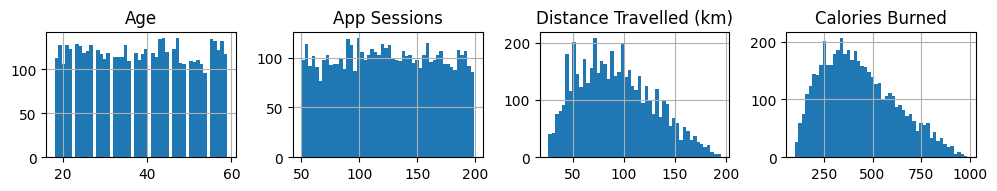

In [9]:
df.hist(bins=50, figsize=(12, 8),layout=(4,4))
plt.show()

## Look for Correlations

Since the dataset is not too large, I can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of numerical attributes using the corr() method:

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the Distance Travelled value tends to go up when the App Sessions goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the Age and the Distance Travelled value. Finally, coefficients close to 0 mean that there is no linear correlation.

In [10]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["Distance Travelled (km)"].sort_values(ascending=False)


Distance Travelled (km)    1.000000
App Sessions               0.857045
Calories Burned            0.680502
Age                       -0.003733
Name: Distance Travelled (km), dtype: float64

Next, I want to check "App Sessions" feature (the previous table does not show a correlation coefficient between "App Sessions" and "Calories Burned").

In [11]:
corr_matrix["App Sessions"].sort_values(ascending=False)


App Sessions               1.000000
Distance Travelled (km)    0.857045
Calories Burned            0.795404
Age                       -0.001718
Name: App Sessions, dtype: float64

Another way to check for correlation between attributes is to use the Pandas scatter_matrix() function, which plots every numerical attribute against every other numerical attribute:

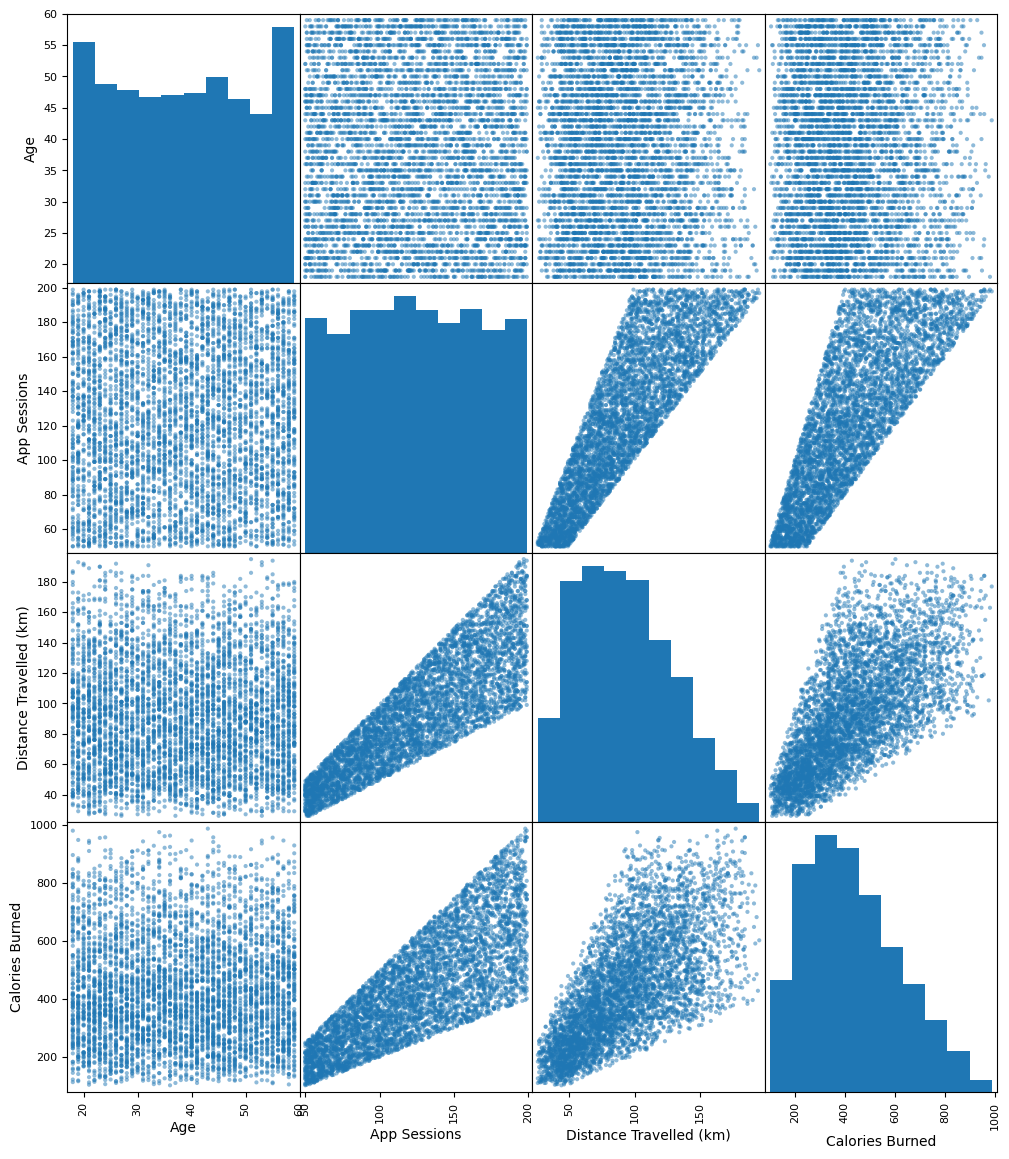

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(12, 14))
plt.show()

We can see a strong correlation between **Distance Travelled (km)** and **App Sessions**, **Calories Burned**.
<br>There is a small correlation between **Distance Travelled (km)** and **Activity Level**.

## Feature Analysis and Visualization:
### User Demographics and Engagement:
This code visualizes the distribution of user demographics (age, gender, activity level, location) and analyzes their relationship with app sessions. Boxplots help understand how app usage varies across different demographic groups. The correlation matrix reveals potential relationships between numerical features like age, app sessions, distance travelled, and calories burned.

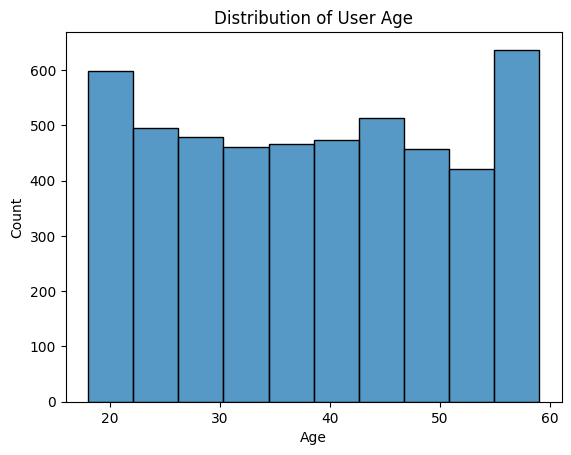

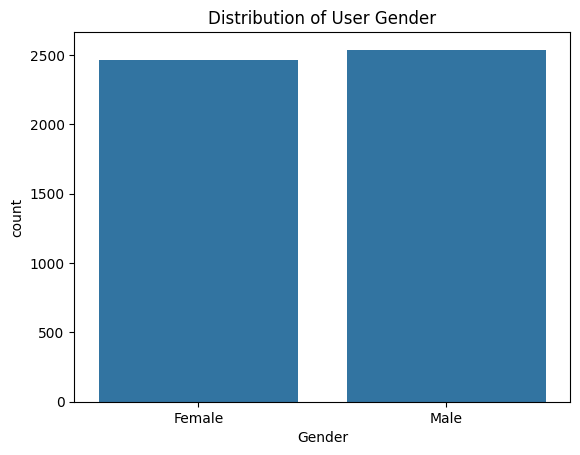

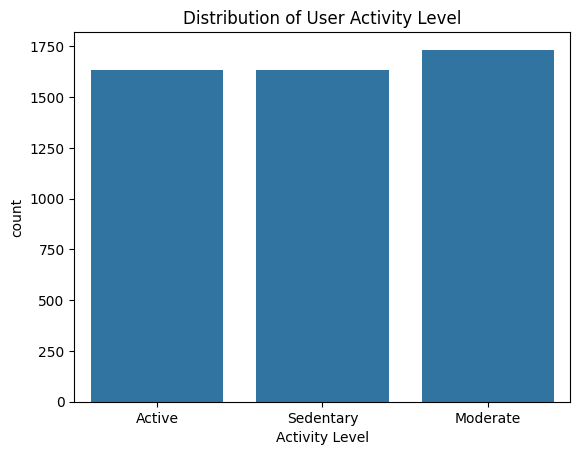

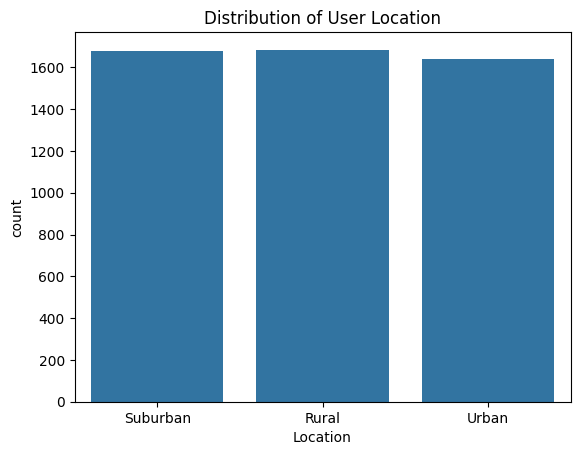

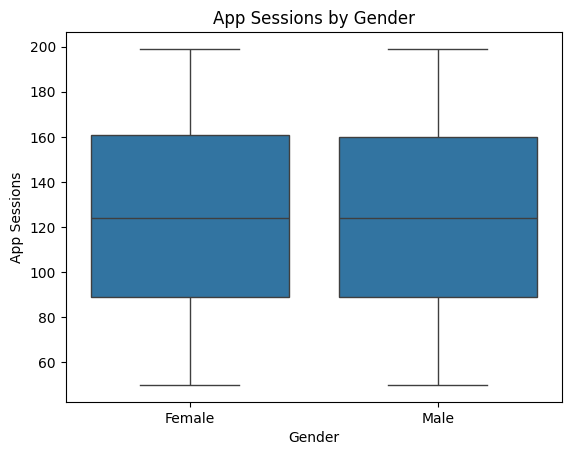

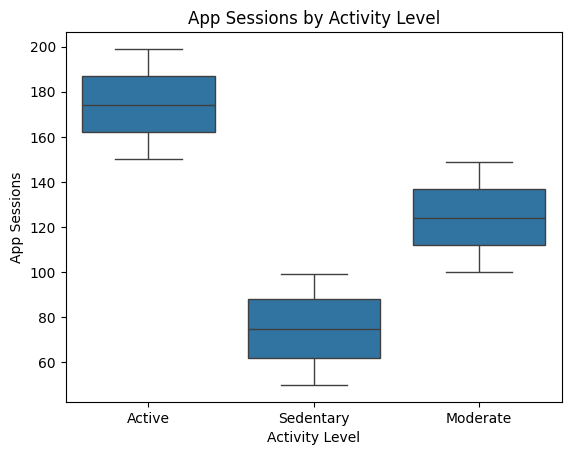

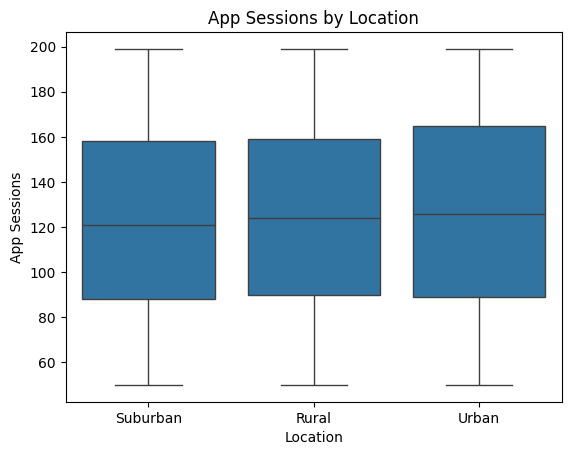

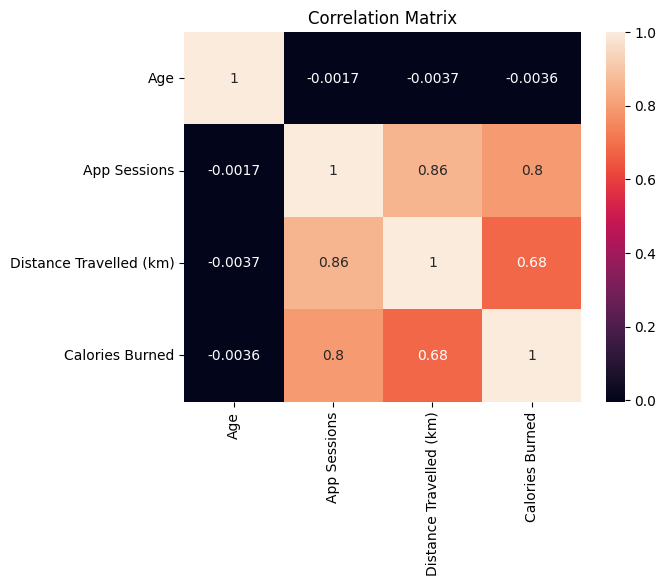

In [13]:
# Visualize the distribution of user demographics
sns.histplot(df['Age'], bins=10)
plt.title('Distribution of User Age')
plt.show()

sns.countplot(x='Gender', data=df)
plt.title('Distribution of User Gender')
plt.show()

sns.countplot(x='Activity Level', data=df)
plt.title('Distribution of User Activity Level')
plt.show()

sns.countplot(x='Location', data=df)
plt.title('Distribution of User Location')
plt.show()

# Analyze the relationship between demographics and app sessions
sns.boxplot(x='Gender', y='App Sessions', data=df)
plt.title('App Sessions by Gender')
plt.show()

sns.boxplot(x='Activity Level', y='App Sessions', data=df)
plt.title('App Sessions by Activity Level')
plt.show()

sns.boxplot(x='Location', y='App Sessions', data=df)
plt.title('App Sessions by Location')
plt.show()

# Calculate correlation between numerical features
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


## App Usage Patterns
This code visualizes the distribution of app usage metrics (app sessions, distance travelled, calories burned) and explores their relationships. Scatter plots can reveal potential correlations and trends between these metrics.

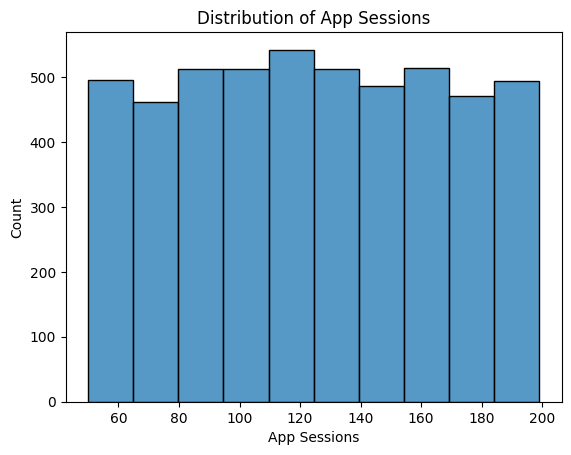

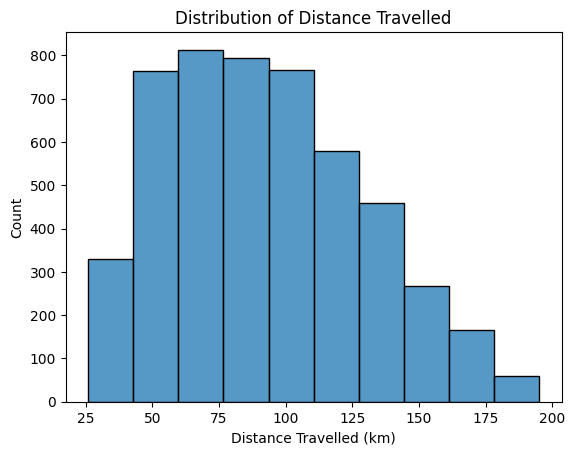

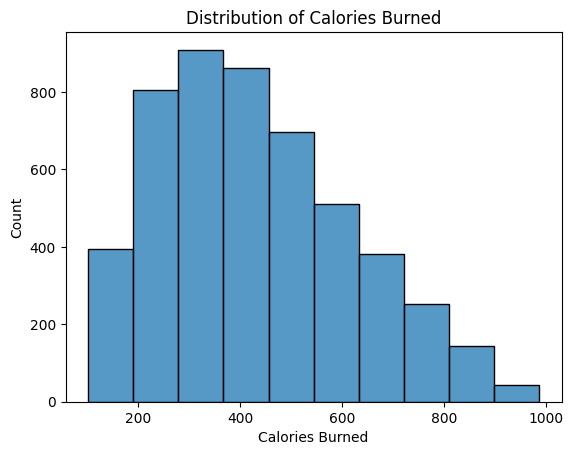

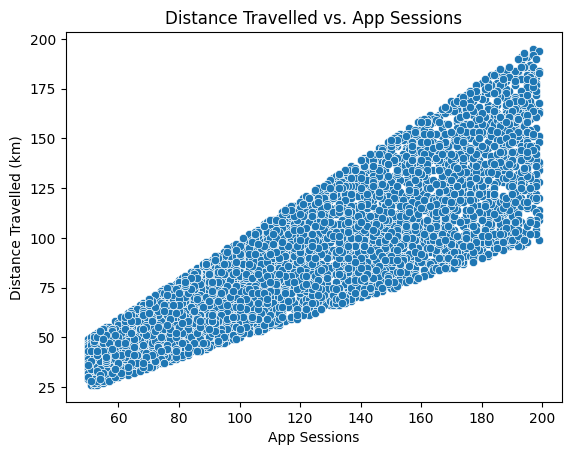

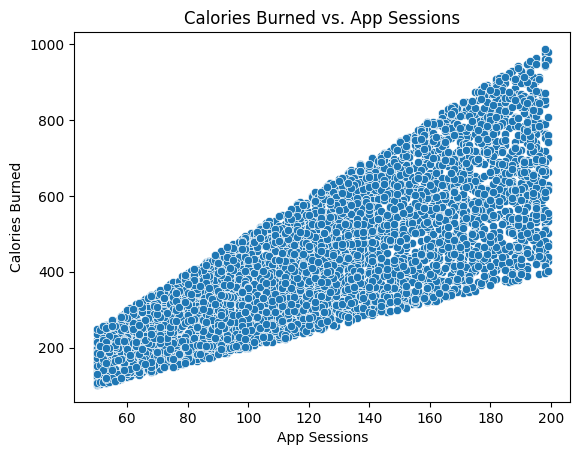

In [14]:
# Analyze the distribution of app usage metrics
sns.histplot(df['App Sessions'], bins=10)
plt.title('Distribution of App Sessions')
plt.show()

sns.histplot(df['Distance Travelled (km)'], bins=10)
plt.title('Distribution of Distance Travelled')
plt.show()

sns.histplot(df['Calories Burned'], bins=10)
plt.title('Distribution of Calories Burned')
plt.show()

# Analyze the relationship between app usage metrics
sns.scatterplot(x='App Sessions', y='Distance Travelled (km)', data=df)
plt.title('Distance Travelled vs. App Sessions')
plt.show()

sns.scatterplot(x='App Sessions', y='Calories Burned', data=df)
plt.title('Calories Burned vs. App Sessions')
plt.show()

# Create Test Set


## The Importance of a Test Set and Data Quality in Fitness App Optimization

Developing effective machine learning models for fitness app optimization requires a rigorous approach to data handling, particularly in the creation of a test set and ensuring dataset quality. These aspects are crucial for building models that accurately predict user behavior and app usage patterns, ultimately leading to informed software engineering decisions.

**The Role of the Test Set:**

A fundamental principle highlighted by Géron [1] is the creation of a test set, a portion of the data strictly reserved for evaluating the model's performance on unseen instances. This practice is essential for two key reasons:

* **Preventing Overfitting:** Complex models, such as deep neural networks, can easily overfit the training data, memorizing patterns that do not generalize well. Evaluating the model on a held-out test set provides a realistic assessment of its generalization capabilities and reveals potential overfitting.
* **Ensuring Unbiased Evaluation:**  Excluding the test set from the training process prevents data snooping bias. This bias occurs when developers, consciously or unconsciously, adjust the model to perform well on the test data, leading to an inflated performance estimate that does not reflect real-world performance.

**Characteristics of a Good Dataset:**

Géron [1] further emphasizes the importance of dataset quality, outlining several key characteristics that contribute to successful machine learning models:

* **Sufficient Size:**  A dataset must be large enough to capture the underlying patterns and relationships within the domain. The required size varies depending on the problem complexity, but generally, more data leads to better model performance.
* **Representativeness:** The training data should accurately reflect the real-world distribution of instances the model will encounter in production. This includes capturing variations and outliers to avoid sampling bias, which can lead to inaccurate predictions.
* **Relevance:** Features within the dataset should be pertinent to the problem being addressed. Irrelevant features introduce noise and can hinder the model's ability to learn meaningful patterns.
* **Quality:** High-quality data is accurate, complete, and consistent. Data errors, missing values, and inconsistencies can significantly degrade model performance.
* **Balance:** For classification tasks, a balanced dataset with a roughly equal number of examples for each class is crucial. Imbalanced datasets can bias the model towards the majority class, leading to poor performance on minority classes.

**Implications for Fitness App Optimization:**

Applying these principles to fitness app optimization is crucial for developing robust and reliable models. A representative test set allows for an accurate evaluation of the model's performance, ensuring that it generalizes well to new users and usage patterns. A high-quality dataset, free from bias and errors, provides a solid foundation for training effective models that can accurately predict user behavior and app usage.

By analyzing the performance of models on the test set and understanding the characteristics of the dataset, software engineers can make informed decisions regarding:

* **Feature Prioritization:** Identifying features that strongly influence user engagement and app performance can guide development efforts towards enhancing or promoting these features within the app.
* **Personalization Strategies:** Segmenting users based on app usage patterns can reveal distinct user groups with different needs and behaviors. This information can be used to personalize the app experience, leading to improved engagement and retention.
* **Performance Bottlenecks:** Analyzing model performance can highlight specific user groups or features that contribute to performance issues. This allows for targeted optimization efforts to improve overall app performance.

**References:**

[1] Géron, A. (2023). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (3rd ed.). O'Reilly Media.


First, I look at min and max values for App Sessions categorical attribute.

*   App Sessions ranges from 50 to 199 (I split it into 3 categories)





In [15]:
df = load_data() # make sure it is clean.

print(df['App Sessions'].describe()['min'])
print(df['App Sessions'].describe()['max'])

50.0
199.0


The following code uses the pd.cut() function to create a category attributes:


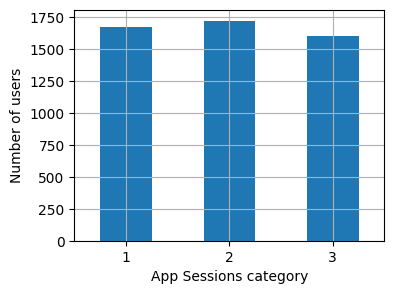

In [16]:
df["sessions_cat"] = pd.cut(df["App Sessions"],
                                    bins=[0, 100, 150, np.inf],
                                    labels=[1, 2, 3])
df["sessions_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True, figsize=(4, 3))
plt.xlabel("App Sessions category")
plt.ylabel("Number of users")
plt.show()

Based on that category, I will do stratified sampling. The following code generates 10 different stratified splits of the same dataset:

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    df, test_size=0.2, stratify=df["sessions_cat"], random_state=42)

With the next code, I check that I get the same proportions of each category in the test set I created. With similar code I measure the sessions category proportions in the full dataset.

In [18]:
strat_test_set["sessions_cat"].value_counts() / len(strat_test_set)

sessions_cat
2    0.345
1    0.335
3    0.320
Name: count, dtype: float64

In [19]:
df["sessions_cat"].value_counts() / len(df)

sessions_cat
2    0.3446
1    0.3350
3    0.3204
Name: count, dtype: float64

As you can see, the test set generated using stratified sampling has sessions category proportions almost identical to those in the full dataset, so my test set is not skewed.

I won’t use the sessions_cat column again, so I can drop it, reverting the data back to its original state:

In [20]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("sessions_cat", axis=1, inplace=True)

# Prepare the Data for Machine Learning Algorithms

It’s time to prepare the data for my machine learning algorithms. Instead of doing this manually, I will write functions for this purpose.

But first, I will revert to a clean training set (by copying strat_train_set).

I'm going to predict the App Sessions value. I will also separate the predictors and the labels, since I don’t necessarily want to apply the same transformations to the predictors and the target values:

In [21]:
df = strat_train_set.drop("App Sessions", axis=1)
df_labels = strat_train_set["App Sessions"].copy()

# Transformation Pipelines

This section details the data transformation pipeline employed to prepare the fitness app dataset for machine learning model training. The pipeline, constructed using Scikit-Learn's `ColumnTransformer` [1], applies a series of transformations to both numerical and categorical features, ensuring data quality and consistency for optimal model performance.

**Pipeline Structure:**

The pipeline consists of three main branches, each handling a specific subset of features:

* **Logarithmic Transformation Branch ("log"):** This branch targets the "Calories Burned" and "Distance Travelled (km)" features, which exhibit right-skewed distributions. As Géron [1] suggests, transforming such features using a logarithmic function can improve model performance by reducing the impact of heavy tails and making the distribution more symmetrical. This branch employs a three-step process:
    1. **Imputation:** Missing values are replaced with the median value of the respective feature using `SimpleImputer`.
    2. **Logarithmic Transformation:** The `FunctionTransformer` applies the `np.log` function to each feature value, effectively compressing the long tail of the distribution.
    3. **Standardization:**  The transformed features are then standardized using `StandardScaler` to ensure a zero mean and unit variance, making them suitable for various machine learning algorithms.

* **One-Hot Encoding Branch ("cat"):** This branch handles the categorical features "Gender," "Activity Level," and "Location." As these features are not inherently numerical, they require encoding to be processed by most machine learning algorithms. The pipeline utilizes `OneHotEncoder` with the `handle_unknown="ignore"` parameter to convert each category into a separate binary feature, effectively creating a one-hot representation.

* **Default Numerical Transformation Branch (remainder):** This branch handles the remaining numerical features ("Age" and "App Sessions") using a two-step process:
    1. **Imputation:** Missing values are replaced with the median value of the respective feature using `SimpleImputer`.
    2. **Standardization:** The features are standardized using `StandardScaler` to ensure a zero mean and unit variance.

**Pipeline Execution:**

The `ColumnTransformer` orchestrates the execution of these branches, applying each transformation to the appropriate columns and concatenating the results horizontally. The `remainder=default_num_pipeline` parameter ensures that any unlisted numerical features are processed by the default numerical transformation branch.

**Benefits of the Pipeline:**

This structured transformation pipeline offers several advantages:

* **Reproducibility:** The pipeline encapsulates all data transformations, making it easy to apply the same preprocessing steps to new datasets or during model deployment.
* **Flexibility:** The modular design allows for easy modification or extension of the pipeline by adding or removing transformation steps as needed.
* **Consistency:**  Applying the same transformations to all data subsets (training, validation, and test sets) ensures data consistency and prevents discrepancies that could negatively impact model performance.

**References:**

[1] Géron, A. (2023). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (3rd ed.). O'Reilly Media.


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"))

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([

        ("log", log_pipeline, ["Calories Burned", "Distance Travelled (km)"]),

        ("cat", cat_pipeline, ["Gender", "Activity Level", "Location"]),
    ],
    remainder=default_num_pipeline)
df_prepared = preprocessing.fit_transform(df)

In [23]:
# extra code – shows that we can get a DataFrame out if we want
df_prepared_fr = pd.DataFrame(
    df_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=df.index)
df_prepared_fr.head(2)

,log__Calories Burned,log__Distance Travelled (km),cat__Gender_Female,cat__Gender_Male,cat__Activity Level_Active,cat__Activity Level_Moderate,cat__Activity Level_Sedentary,cat__Location_Rural,cat__Location_Suburban,cat__Location_Urban,remainder__User ID,remainder__Age
368,-0.889263,-0.230907,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.463871,0.203217
1790,-0.914503,-0.200521,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.475471,1.598064


Here you can see that the distribution of Calories Burned after applying the transformation pipeline became roughly symmetrical.

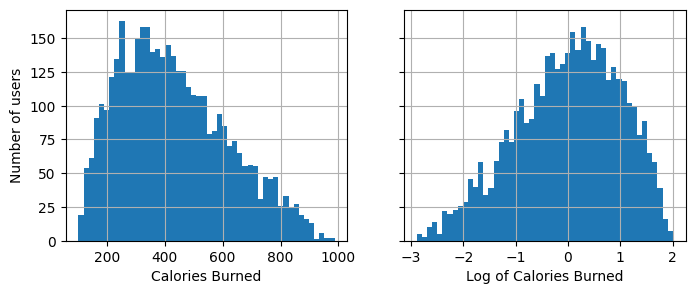

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

df['Calories Burned'].hist(ax=axs[0], bins=50, figsize=(8, 3))
axs[0].set_xlabel("Calories Burned")
axs[1].set_xlabel("Log of Calories Burned")
axs[0].set_ylabel("Number of users")
plt.xlabel('Original Calories Burned Distribution')
df_prepared_fr['log__Calories Burned'].hist(ax=axs[1], bins=50, figsize=(8, 3))
plt.xlabel('Log of Calories Burned')
plt.show()


# Select and Train a Model

## Train and Evaluate on the Training Set


### Linear Regression

I decide to train a very basic linear regression model to get started:

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(df, df_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Calories Burned',
                                                   'Distance Travelled (km)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Activity Level',
                                                   'Location'])])),
                ('linearregression', LinearRegression())])

I try it out on the training set, looking at the first five predictions and comparing them to the labels:

In [26]:
df_predictions = lin_reg.predict(df)
df_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([100., 100., 100., 100., 200.])

Compare against the actual values:

In [27]:
df_labels.iloc[:5].values

array([121,  99,  54, 133, 182])

In [28]:
# extra code – computes the error ratios
error_ratios = df_predictions[:5].round(-2) / df_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-17.4%, 1.0%, 85.2%, -24.8%, 9.9%


A typical performance measure for regression problems is the root mean square error (RMSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight given to large errors.

In [29]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(df_labels, df_predictions,
                               squared=False)

lin_rmse

11.239843945280985

So a typical prediction error is 11 app sessions.

### Decision Tree Regressor

 I decide to try a DecisionTreeRegressor, as this is a fairly powerful model capable of finding complex nonlinear relationships in the data:

In [30]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(df, df_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Calories Burned',
                                                   'Distance Travelled (km)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Activity Level',
                                                   'Location'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [31]:
df_predictions = tree_reg.predict(df)
tree_rmse = mean_squared_error(df_labels, df_predictions,
                                squared=False)

tree_rmse

0.0

### Better Evaluation Using Cross-Validation

It looks very well, I didn’t want to touch the test set until I'm ready to launch a model I'm confident about, so I need to use part of the training set for training and part of it for model validation.

One way to evaluate the decision tree model would be to use the train_​test_split() function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set. It’s a bit of effort, but nothing too difficult, and it would work fairly well.

A great alternative is to use Scikit-Learn’s k_-fold cross-validation feature. The following code randomly splits the training set into 10 nonoverlapping subsets called folds, then it trains and evaluates the decision tree model 10 times, picking a different fold for evaluation every time and using the other 9 folds for training. The result is an array containing the 10 evaluation scores:

In [32]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, df, df_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

count    10.000000
mean     15.146944
std       0.567488
min      14.259383
25%      14.909056
50%      15.087539
75%      15.375416
max      16.256614
dtype: float64

Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its standard deviation). The decision tree has an RMSE of about 15.46, with a standard deviation of about 0.37. You would not have this information if you just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always feasible.

Let’s try one last model now: the RandomForestRegressor. Random forests work by training many decision trees on random subsets of the features, then averaging out their predictions. Such models composed of many other models are called ensembles: they are capable of boosting the performance of the underlying model (in this case, decision trees). The code is much the same as earlier:

In [33]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, df, df_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [34]:
pd.Series(forest_rmses).describe()

count    10.000000
mean     11.060224
std       0.373720
min      10.469417
25%      10.873814
50%      11.180447
75%      11.216294
max      11.550422
dtype: float64

It takes more time to train a model but the results are almost the same as for the linear regression model.

Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [35]:
forest_reg.fit(df, df_labels)
df_predictions = forest_reg.predict(df)
forest_rmse = mean_squared_error(df_labels, df_predictions,
                                 squared=False)
forest_rmse

4.155188470454741

The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts.

# Evaluate Your System on the Test Set

In [36]:
X_test = strat_test_set.drop("App Sessions", axis=1)
y_test = strat_test_set["App Sessions"].copy()

final_predictions = forest_reg.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

10.993437224089652


We can compute a 95% confidence interval for the test RMSE:

In [37]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([10.51786088, 11.44927624])